In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("uber.csv")  
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df = df.dropna()
df.shape

(199999, 9)

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.dayofweek
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3


In [6]:
uber = df.drop(['Unnamed: 0','key'],axis=1)
uber.dropna(axis=0,inplace=True)

In [7]:
uber.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3


In [8]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in KM
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c


In [9]:
uber['Distance'] = haversine(
    uber['pickup_latitude'],
    uber['pickup_longitude'],
    uber['dropoff_latitude'],
    uber['dropoff_longitude']
)

uber.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,4.475450


Text(0, 0.5, 'fare_amount')

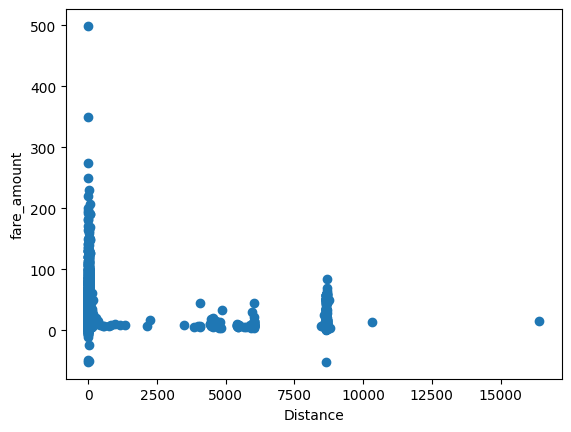

In [10]:
plt.scatter(uber['Distance'], uber['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [11]:
uber.drop(uber[uber['Distance'] > 60].index, inplace = True)
uber.drop(uber[uber['Distance'] == 0].index, inplace = True)
uber.drop(uber[uber['fare_amount'] == 0].index, inplace = True)
uber.drop(uber[uber['fare_amount'] < 0].index, inplace = True)

In [12]:
uber.drop(uber[(uber['fare_amount']>100) & (uber['Distance']<1)].index, inplace = True )
uber.drop(uber[(uber['fare_amount']<100) & (uber['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

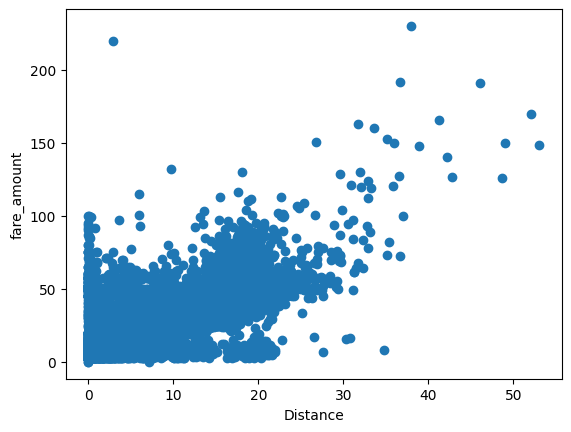

In [13]:
plt.scatter(uber['Distance'], uber['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [14]:
uber.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,4.475450


In [15]:
uber = uber.drop(['pickup_datetime'],axis=1)
uber.dropna(axis=0,inplace=True)

In [16]:
uber.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,4.475450


In [17]:
corr = uber.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,Distance
fare_amount,1.000000,0.011970,-0.008610,0.010464,-0.008621,0.012949,-0.020211,0.000162,0.024361,0.005432,0.884952
pickup_longitude,0.011970,1.000000,-0.949098,0.999883,-0.993974,0.009175,0.001842,0.019511,-0.007489,0.008234,0.005355
pickup_latitude,-0.008610,-0.949098,1.000000,-0.949094,0.954759,-0.009219,-0.001821,-0.019369,0.007595,-0.008916,0.003202
dropoff_longitude,0.010464,0.999883,-0.949094,1.000000,-0.993961,0.009169,0.000943,0.019538,-0.007447,0.008528,0.004425
dropoff_latitude,-0.008621,-0.993974,0.954759,-0.993961,1.000000,-0.009266,-0.001017,-0.020092,0.007972,-0.008910,-0.002150
passenger_count,0.012949,0.009175,-0.009219,0.009169,-0.009266,1.000000,0.013372,0.003563,0.009958,0.033796,0.007746
hour,-0.020211,0.001842,-0.001821,0.000943,-0.001017,0.013372,1.000000,0.005321,-0.004164,-0.086270,-0.032188
day,0.000162,0.019511,-0.019369,0.019538,-0.020092,0.003563,0.005321,1.000000,-0.017091,0.005018,0.000087
month,0.024361,-0.007489,0.007595,-0.007447,0.007972,0.009958,-0.004164,-0.017091,1.000000,-0.008906,0.012145
weekday,0.005432,0.008234,-0.008916,0.008528,-0.008910,0.033796,-0.086270,0.005018,-0.008906,1.000000,0.017242


In [18]:
features = ['Distance', 'passenger_count', 'hour', 'weekday', 'month']
X = uber[features]
y = uber['fare_amount']

X.head()

,Distance,passenger_count,hour,weekday,month
0,1.683323,1,19,3,5
1,2.457590,1,20,4,7
2,5.036377,1,21,0,8
3,1.661683,3,8,4,6
4,4.475450,5,17,3,8


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("LR R2:", r2_score(y_test, y_pred_lr))
print("LR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("LR MAE:", mean_absolute_error(y_test, y_pred_lr))


LR R2: 0.7809988015831334
LR RMSE: 4.480433130687788
LR MAE: 2.3406618062913473


In [21]:
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))


RF R2: 0.7811024731573037
RF RMSE: 4.479372523387683
RF MAE: 2.4167497463412957
